<a href="https://colab.research.google.com/github/MuhammedShiway/Differential-Convolution-Modifications/blob/main/%5BCompleted%5D_Differential_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import transforms
from PIL import Image

In [ ]:
class DiffConv(nn.Module):

    def __init__(self):
        super(DiffConv, self).__init__()




    def forward(self, x):
        sizeofin = x.size()

        ins = sizeofin[0]
        n = sizeofin[1]
        sx = sizeofin[2]
        sy = sizeofin[3]

        self.output = torch.zeros(ins,n*5,sx,sy)
        self.signInputs = torch.zeros(ins,n*5,sx,sy)


        for i in range(0,ins):


            oM = 0
            oN = n

            self.output[i,oM:oN,0:sx,0:sy]= x[i].clone()

            oM = n
            oN = 2*n

            #area = self.output[i,oM:oN,0:sx-1,0:sy]
            self.output[i,oM:oN,0:sx-1,0:sy] = self.output[i,oM:oN,0:sx-1,0:sy].add(x[i,0:n,0:sx-1,0:sy])
            self.output[i,oM:oN,0:sx-1,0:sy] = self.output[i,oM:oN,0:sx-1,0:sy].add(-x[i,0:n,1:sx,0:sy])

            oM = 2*n
            oN = 3*n

            #area = ptr[oM:oN,0:sx,0:sy-1]
            self.output[i,oM:oN,0:sx,0:sy-1]=self.output[i,oM:oN,0:sx,0:sy-1].add(x[i,0:n,0:sx,0:sy-1])
            self.output[i,oM:oN,0:sx,0:sy-1]=self.output[i,oM:oN,0:sx,0:sy-1].add(-x[i,0:n,0:sx,1:sy])

            oM = 3*n
            oN = 4*n

            #area = ptr[oM:oN,0:sx-1,0:sy-1]
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(x[i,0:n,0:sx-1,0:sy-1])
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(-x[i,0:n,1:sx,1:sy])

            oM = 4*n
            oN = 5*n

            #area = ptr[oM:oN,0:sx-1,0:sy-1]
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(x[i,0:n,1:sx,0:sy-1])
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(-x[i,0:n,0:sx-1,1:sy])


        oM = n
        oN = 5*n


        #self.signInputs = self.output.sign()
        #self.signInputs[0:ins,0:n,:,:] = torch.ones(ins,n,sx,sy)
        self.output[0:ins,oM:oN,:,:] = self.output[0:ins,oM:oN].abs()

        #print(self.output)

        return self.output

In [ ]:
#Let's import an image and use it for the testing
from google.colab import files
files.upload();

Saving images.jpg to images.jpg


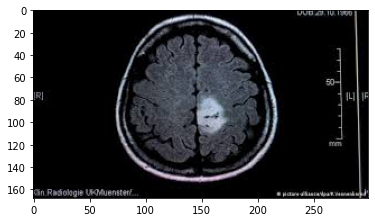

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/images.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#Get some info about the image
img.shape

(168, 299, 3)

In [ ]:
#Loading Image with Torch
img_1 = Image.open('/content/images.jpg')
img_1.size

(299, 168)

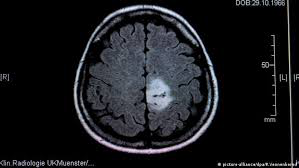

In [ ]:
img_1

In [ ]:
#Convert to TENSOR
transform = transforms.Compose([transforms.PILToTensor()])

img_tensor = transform(img_1)

In [ ]:
img_tensor.size()

torch.Size([3, 168, 299])

In [ ]:
x= torch.rand(1,1,5,5);
x.size()

torch.Size([1, 1, 5, 5])

In [ ]:
print(img_tensor[0][0])

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  16,  10,   3,   4,   9,  11,
          9,   6,   0,   0,   0,   0,   0,   1,   1,   1,   6,   0,   0,   5,
          0,   0,   0,   9,   1,   6,   4,  10,   6,   1,  11,  10,   1,   1,
          1,   1,   1,   1,   3,   9,  13,  10,   7,   3,   3,   1,   1,   2,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [ ]:
#Convert to image
import torchvision.transforms as T

r_transform = T.ToPILImage()

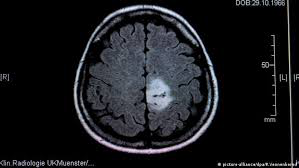

In [ ]:
r_img = r_transform(img_tensor)
r_img

In [ ]:
import torch
#import DiffConv
#from DiffConv import DiffConv
from numpy import genfromtxt
import numpy as np
import torch.nn as nn

import torch.nn.functional as F

from os import listdir
from os.path import isfile, join


from torch.optim.lr_scheduler import MultiStepLR
import os
import torch.autograd as autograd
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms
import torchvision.datasets as datasets
import math

import time
import sys
from torchvision.utils import save_image
from multiprocessing import set_start_method

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.con1 = nn.Conv2d(3, 128, 11,4)
        self.pool1 = nn.MaxPool2d(2,2)
        self.con2 = nn.Conv2d(128, 256, 5)
        self.pool2 = nn.MaxPool2d(2,2)
        self.con3 = nn.Conv2d(256,512, 5)
        self.pool3 = nn.MaxPool2d(2,2)
        self.con4 = nn.Conv2d(2560,1024, 4)
        self.diffcon = DiffConv()

        self.linear2= nn.Linear(1024,4096)


    def forward(self, x):
        x = F.relu(self.con1(x))
        x = self.pool1(x)
        x = F.relu(self.con2(x))
        x = self.pool2(x)
        x = F.relu(self.con3(x))
        x = self.pool3(x)
        x = self.diffcon(x)

        x = F.relu(self.con4(x))

        x = x.view(x.shape[0],-1)
        x = self.linear2(x)




        return x



model = Net()

In [ ]:
p = DiffConv()

In [ ]:
x= torch.rand(1,1,5,5);

print(x[0][0])

tensor([[0.6764, 0.9683, 0.4386, 0.3305, 0.4368],
        [0.1553, 0.8084, 0.3293, 0.7535, 0.4760],
        [0.4155, 0.4010, 0.8327, 0.3622, 0.9949],
        [0.3502, 0.4070, 0.9662, 0.3167, 0.1838],
        [0.6745, 0.5584, 0.9531, 0.9119, 0.3510]])


In [ ]:
t = p.forward(x);
print(t.size())

torch.Size([1, 5, 5, 5])


In [ ]:
print(t[0][0])
print(t[0][1])
print(t[0][2])
print(t[0][3])
print(t[0][4])

tensor([[0.6764, 0.9683, 0.4386, 0.3305, 0.4368],
        [0.1553, 0.8084, 0.3293, 0.7535, 0.4760],
        [0.4155, 0.4010, 0.8327, 0.3622, 0.9949],
        [0.3502, 0.4070, 0.9662, 0.3167, 0.1838],
        [0.6745, 0.5584, 0.9531, 0.9119, 0.3510]])
tensor([[0.5211, 0.1599, 0.1093, 0.4230, 0.0391],
        [0.2602, 0.4075, 0.5034, 0.3913, 0.5189],
        [0.0652, 0.0060, 0.1335, 0.0454, 0.8110],
        [0.3243, 0.1514, 0.0131, 0.5951, 0.1672],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[0.2919, 0.5297, 0.1081, 0.1064, 0.0000],
        [0.6532, 0.4791, 0.4241, 0.2775, 0.0000],
        [0.0145, 0.4317, 0.4705, 0.6327, 0.0000],
        [0.0568, 0.5593, 0.6495, 0.1329, 0.0000],
        [0.1161, 0.3947, 0.0412, 0.5608, 0.0000]])
tensor([[0.1320, 0.6390, 0.3149, 0.1455, 0.0000],
        [0.2457, 0.0242, 0.0328, 0.2414, 0.0000],
        [0.0085, 0.5653, 0.5160, 0.1783, 0.0000],
        [0.2082, 0.5461, 0.0544, 0.0343, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000

## Testing DiffConv on the image

In [ ]:
#EXPAND IMAGE DIMENSION (numpy)
img_tensor_1 = np.expand_dims(img_tensor, axis=0)

In [ ]:
img_tensor_1.shape
#IT IS NOW AN IMAGE

(1, 3, 168, 299)

In [ ]:
img_tensor.shape[1]

168

In [ ]:
#EXPAND IMAGE DIMENSION (reshape)

img_tensor_2 = img_tensor.reshape(1, img_tensor.shape[0], img_tensor.shape[1], img_tensor.shape[2])

In [ ]:
img_tensor_2.size()
#IT IS STILL A TENSOR

torch.Size([1, 3, 168, 299])

In [ ]:
t1 = p.forward(img_tensor_2)

In [ ]:
print(t1.size())

torch.Size([1, 15, 168, 299])


In [ ]:
print(t1[0][0])
print(t1[0][1])
print(t1[0][2])
print(t1[0][3])
print(t1[0][4])

tensor([[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   6.,  78.,  ..., 146.,   0.,   0.],
        [ 13.,   0.,   0.,  ...,  16.,   0.,   1.],
        [  0.,  10.,   9.,  ...,   0.,  17.,   0.]])
tensor([[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   5.,  77.,  ..., 145.,   0.,   0.],
        [ 12.,   0.,   0.,  ...,  15.,   0.,   1.],
        [  0.,  10.,   9.,  ...,   0.,  17.,   0.]])
tensor([[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        ...,
        [  4.,  10.,  82.,  ..., 153.,   9.,  11.],
        [ 17.,   4.,   4.,  ...,  21.,   7.,  11.],
        [  2.,  12.,  11.,  ...,   5.,  25.,   8.]])
tensor([[  0.,   0.,  

In [ ]:
t1[0][0]

tensor([[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   6.,  78.,  ..., 146.,   0.,   0.],
        [ 13.,   0.,   0.,  ...,  16.,   0.,   1.],
        [  0.,  10.,   9.,  ...,   0.,  17.,   0.]])

In [ ]:
#CONVERT SOME OF THE TENSORS TO IMAGES
r0 = r_transform(t1[0][0])
r1 = r_transform(t1[0][5])
r2 = r_transform(t1[0][8])
r3 = r_transform(t1[0][10])
r4 = r_transform(t1[0][14])

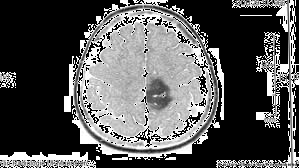

In [ ]:
r0

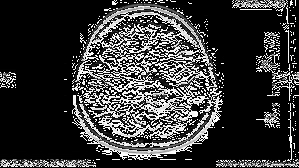

In [ ]:
r1

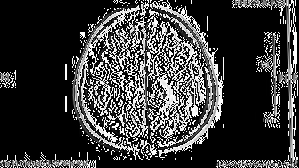

In [ ]:
r2

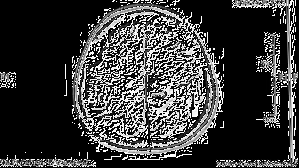

In [ ]:
r3

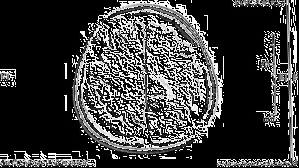

In [ ]:
r4

In [ ]:
t1.size()

torch.Size([1, 15, 168, 299])

In [ ]:
#LET'S TAKE THE MEAN OF THE NEW 12 LAYERS

img_samp = t1[0][3::]

In [ ]:
img_samp.size()

torch.Size([12, 168, 299])

In [ ]:
#m = nn.AdaptiveAvgPool2d(168,299)
img_adp = torch.mean(img_samp, dim=0)

In [ ]:
img_adp.size()

torch.Size([168, 299])

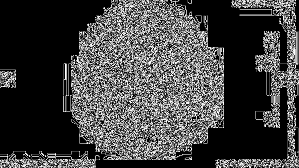

In [ ]:
r_transform(img_adp)

CONCLUSION: IT IS POINTLESS. (Well, not literally :) )